#Assignment-5 (21MIS1114-Chandrakanth.V)

In [37]:
#import necessary libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv("datasets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
#No null values from above
#as there is gender column lets label encode that .
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.head()
df=df.drop(columns=['CustomerID'])

#Data Visualistion Univaraite,Bivariate,multivariate

<AxesSubplot: xlabel='Age', ylabel='Density'>

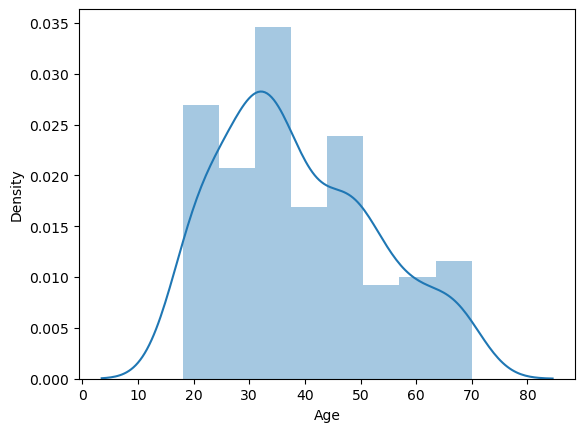

In [41]:
sns.distplot(df.Age)

<AxesSubplot: xlabel='Age', ylabel='Spending Score (1-100)'>

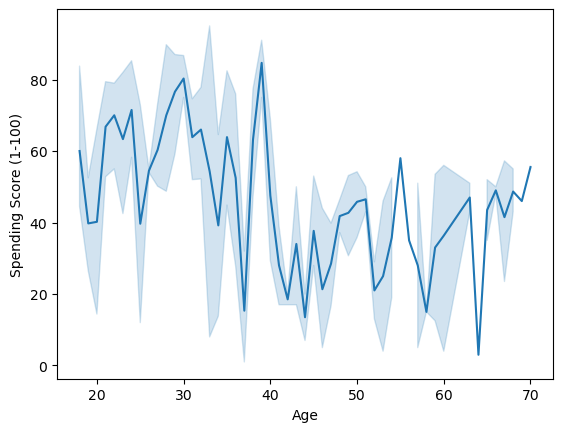

In [42]:
sns.lineplot(x=df.Age,y=df['Spending Score (1-100)'])

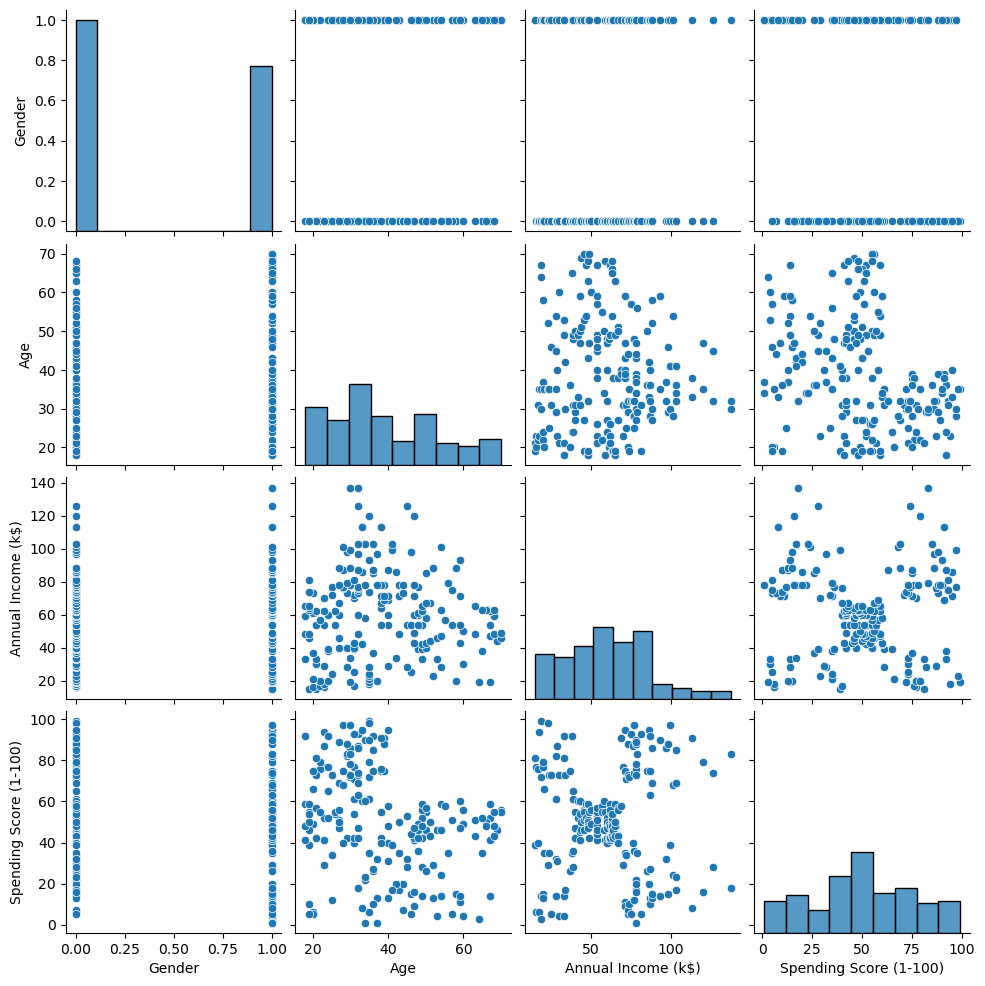

In [43]:
sns.pairplot(df)

<AxesSubplot: ylabel='Annual Income (k$)'>

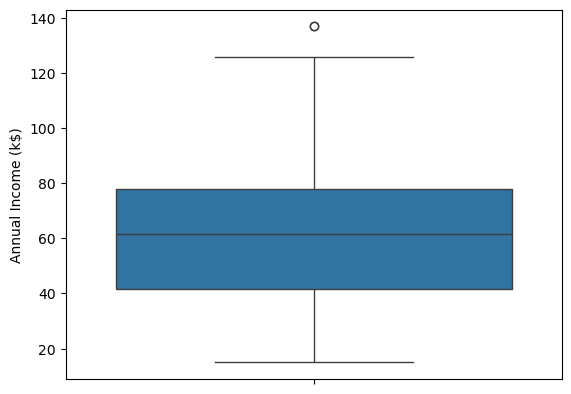

In [44]:
#Lets see if any outliers.
sns.boxplot(df['Annual Income (k$)'])

<AxesSubplot: ylabel='Spending Score (1-100)'>

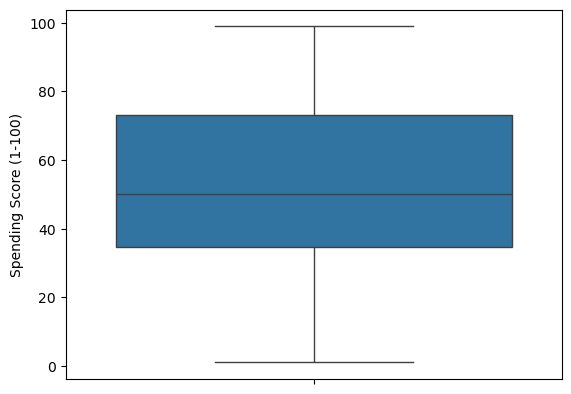

In [45]:
sns.boxplot(df['Spending Score (1-100)'])

In [46]:
#Almost no outlier except for one ,continue


#Model building


In [47]:
from sklearn import cluster
error=[]
for i in range(1,20):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

In [48]:
error

[308862.06,
 212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75399.61541401483,
 58348.64136331506,
 51132.70321257689,
 44392.11566567936,
 41000.874221320715,
 37649.69225429743,
 34665.08727759879,
 31659.187454375697,
 29388.61288883975,
 28170.631036266237,
 26470.479533783215,
 24712.85956061912,
 23769.67982026144,
 22830.863516113517,
 20917.416472416473]

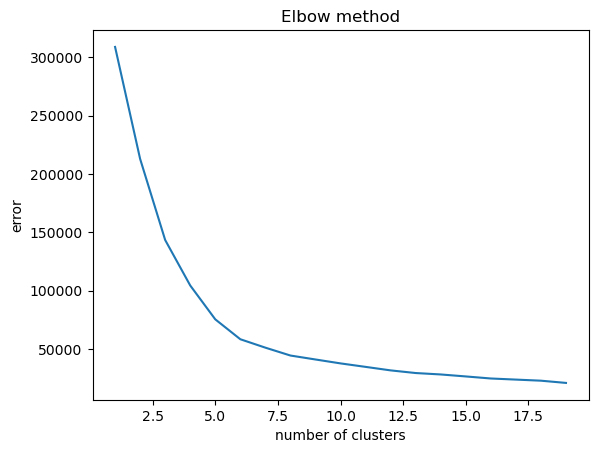

In [49]:

plt.plot(range(1,20),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [50]:
kmeans=cluster.KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=0)

In [51]:
pred=kmeans.predict(df)
pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [52]:
#we can do clusterign removing age
df=df.drop(columns=['Age','Gender'])
from sklearn import cluster
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


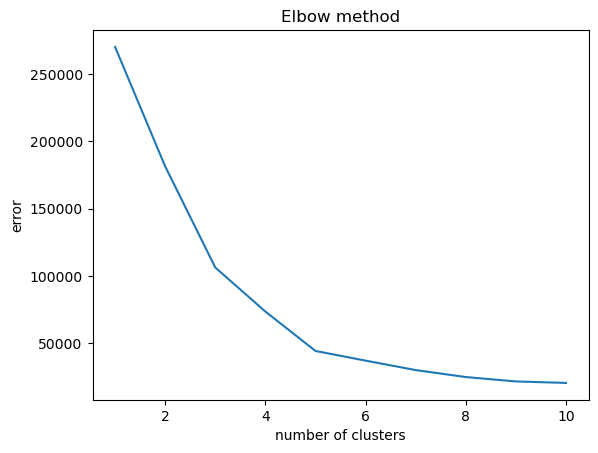

In [53]:

plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [54]:
kmeans=cluster.KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans.fit(df)
pred=kmeans.predict(df)
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

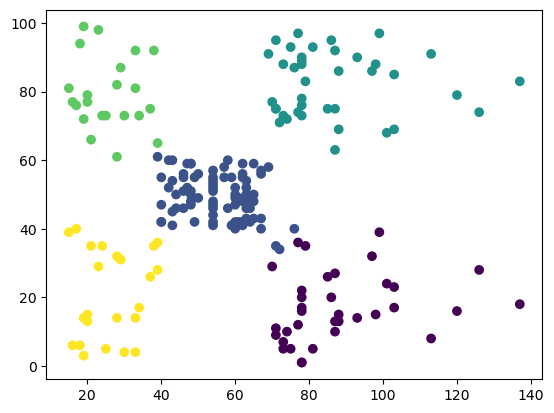

In [55]:
plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = kmeans.labels_)

In [56]:
kmeans.predict([[10,10]])

array([4], dtype=int32)

In [57]:
kmeans.predict([[78,73]])

array([2], dtype=int32)